In [1]:
# 定义全局函数便于直接调用处理
import pandas as pd
import numpy as np
from datetime import date
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline
import warnings
warnings.filterwarnings("ignore")
############全局参数#################################
discrete_list = ['pax_name_passport', 'seg_route_from', 'seg_route_to', 'seg_flight', 'seg_cabin',
                 'seg_dep_time', 'emd_lable', 'gender', 'age', 'birth_date', 'residence_country', 'nation_name',
                 'city_name',
                 'province_name', 'marital_stat', 'ffp_nbr', 'member_level', 'often_city', 'enroll_chnl',
                 'pref_aircraft_m3_1', 'pref_aircraft_m3_2', 'pref_aircraft_m3_3', 'pref_aircraft_m3_4',
                 'pref_aircraft_m3_5', 'pref_aircraft_m6_1', 'pref_aircraft_m6_2', 'pref_aircraft_m6_3',
                 'pref_aircraft_m6_4', 'pref_aircraft_m6_5', 'pref_aircraft_y1_1', 'pref_aircraft_y1_2',
                 'pref_aircraft_y1_3', 'pref_aircraft_y1_4', 'pref_aircraft_y1_5', 'pref_aircraft_y2_1',
                 'pref_aircraft_y2_2', 'pref_aircraft_y2_3', 'pref_aircraft_y2_4', 'pref_aircraft_y2_5',
                 'pref_aircraft_y3_1', 'pref_aircraft_y3_2', 'pref_aircraft_y3_3', 'pref_aircraft_y3_4',
                 'pref_aircraft_y3_5', 'pref_orig_m3_1', 'pref_orig_m3_2', 'pref_orig_m3_3', 'pref_orig_m3_4',
                 'pref_orig_m3_5', 'pref_orig_m6_1', 'pref_orig_m6_2', 'pref_orig_m6_3', 'pref_orig_m6_4',
                 'pref_orig_m6_5', 'pref_orig_y1_1', 'pref_orig_y1_2', 'pref_orig_y1_3', 'pref_orig_y1_4',
                 'pref_orig_y1_5', 'pref_orig_y2_1', 'pref_orig_y2_2', 'pref_orig_y2_3', 'pref_orig_y2_4',
                 'pref_orig_y2_5', 'pref_orig_y3_1', 'pref_orig_y3_2', 'pref_orig_y3_3', 'pref_orig_y3_4',
                 'pref_orig_y3_5', 'pref_line_m3_1', 'pref_line_m3_2', 'pref_line_m3_3', 'pref_line_m3_4',
                 'pref_line_m3_5', 'pref_line_m6_1', 'pref_line_m6_2', 'pref_line_m6_3', 'pref_line_m6_4',
                 'pref_line_m6_5', 'pref_line_y1_1', 'pref_line_y1_2', 'pref_line_y1_3', 'pref_line_y1_4',
                 'pref_line_y1_5', 'pref_line_y2_1', 'pref_line_y2_2', 'pref_line_y2_3', 'pref_line_y2_4',
                 'pref_line_y2_5', 'pref_line_y3_1', 'pref_line_y3_2', 'pref_line_y3_3', 'pref_line_y3_4',
                 'pref_line_y3_5', 'pref_city_m3_1', 'pref_city_m3_2', 'pref_city_m3_3', 'pref_city_m3_4',
                 'pref_city_m3_5', 'pref_city_m6_1', 'pref_city_m6_2', 'pref_city_m6_3', 'pref_city_m6_4',
                 'pref_city_m6_5', 'pref_city_y1_1', 'pref_city_y1_2', 'pref_city_y1_3', 'pref_city_y1_4',
                 'pref_city_y1_5', 'pref_city_y2_1', 'pref_city_y2_2', 'pref_city_y2_3', 'pref_city_y2_4',
                 'pref_city_y2_5', 'pref_city_y3_1', 'pref_city_y3_2', 'pref_city_y3_3', 'pref_city_y3_4',
                 'pref_city_y3_5', 'recent_flt_day', 'pit_add_chnl_m3', 'pit_add_chnl_m6', 'pit_add_chnl_y1',
                 'pit_add_chnl_y2', 'pit_add_chnl_y3', 'pref_orig_city_m3', 'pref_orig_city_m6', 'pref_orig_city_y1',
                 'pref_orig_city_y2', 'pref_orig_city_y3', 'pref_dest_city_m3', 'pref_dest_city_m6',
                 'pref_dest_city_y1', 'pref_dest_city_y2', 'pref_dest_city_y3'
                 ]  # 离散型的特征
drop_list = []  # 在预处理阶段发现与测试集明显不同的特征，需要预先处理掉

############目录定义#################################
datapath = 'D:/outsourcing/data/'
featurepath = 'D:/outsourcing/feature/'
resultpath = 'D:/outsourcing/result/'
tmppath = 'D:/outsourcing/tmp/'


###############函数定义################################
# reduce memory
def read_csv(file_name, num_rows=None):
    if num_rows is None:
        return pd.read_csv(file_name)
    return pd.read_csv(file_name, nrows=num_rows)


def reduce_mem_usage(df, verbose=True):
    start_mem = df.memory_usage().sum() / 1024 ** 2
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024 ** 2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df


In [2]:
train = reduce_mem_usage(read_csv(datapath + "clean_train.csv"))
test = reduce_mem_usage(read_csv(datapath + "clean_test.csv"))


Memory usage after optimization is: 42.95 MB
Decreased by 63.4%
Memory usage after optimization is: 12.24 MB
Decreased by 63.9%


In [3]:
draw_features = ['pax_fcny','pax_tax','dist_cnt_y2','flt_nature_cnt_y2',
                 'avg_dist_cnt_m3','avg_dist_cnt_m6','avg_dist_cnt_y1',
                 'avg_dist_cnt_y2','avg_dist_cnt_y3'
                 ,'flt_delay_time_y3','dist_cnt_y1','flt_nature_cnt_y1']

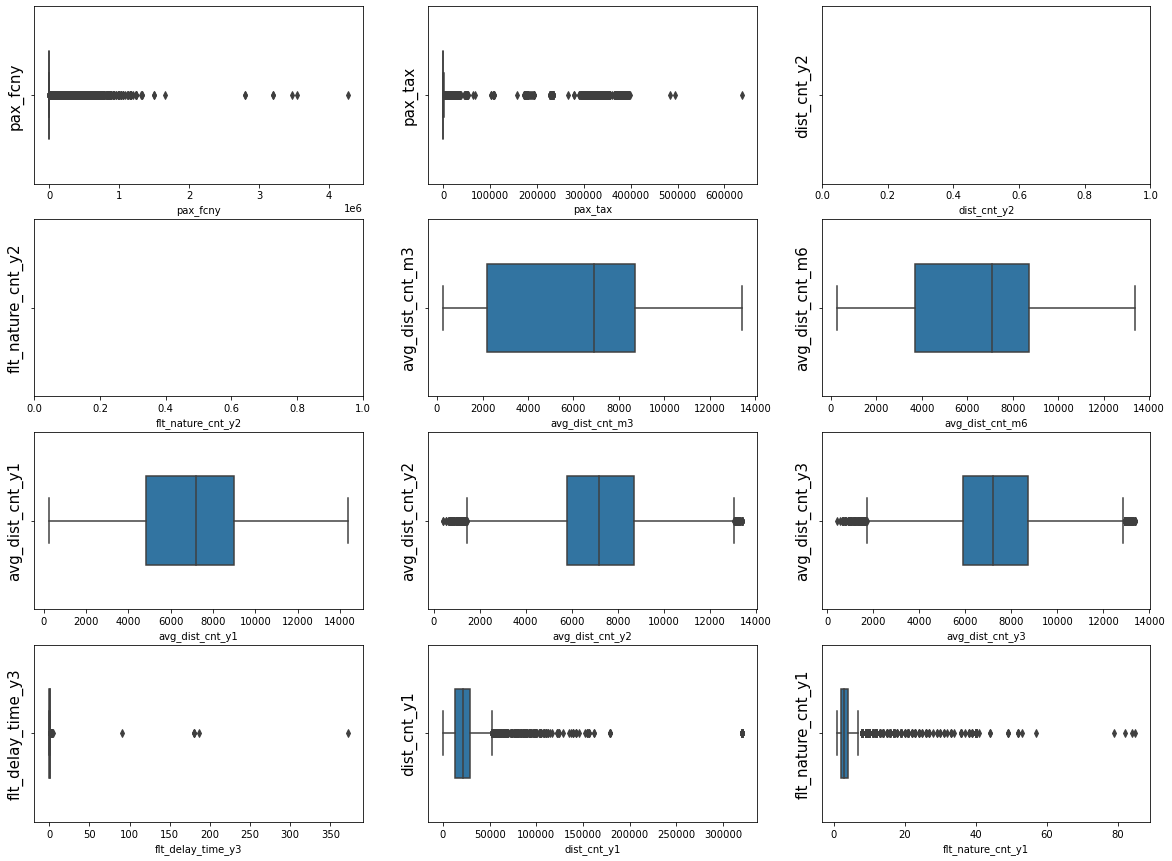

In [4]:

fig = plt.figure(figsize=(20, 15))
i = 0
for column in draw_features:
    plt.subplot(4, 3, i+1)
    sns.boxplot(train[column][train[column] != 0], orient='v', width=0.5)
    plt.ylabel(column, fontsize=15)
    i = i + 1
plt.show()

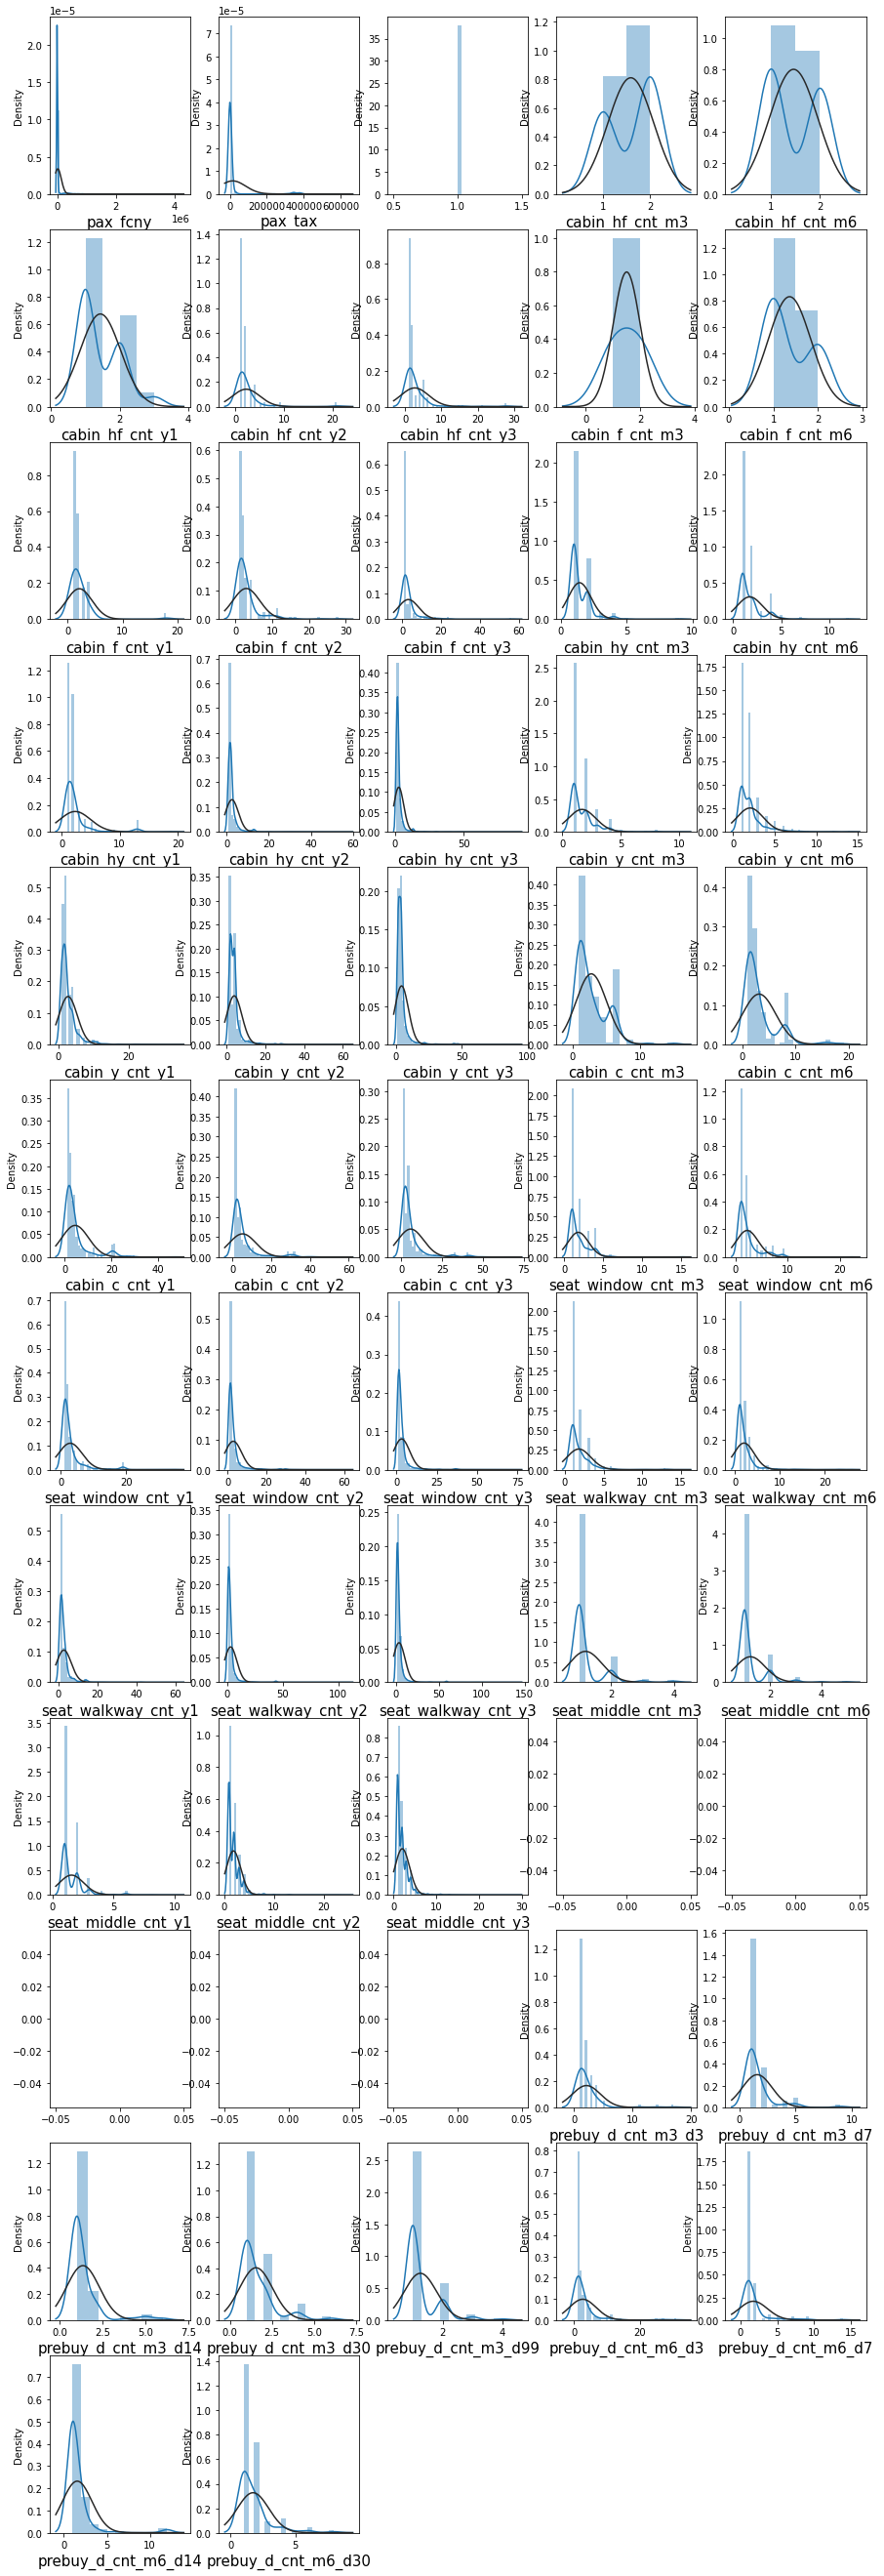

In [5]:
#去除值为0的缺失值
import seaborn as sns
from scipy import stats
from numpy.linalg import LinAlgError
train_cols = 5
train_rows = 100  # 因为不能画出这么大的图片，先画出一部分随机抽取的
plt.figure(figsize=(3 * train_cols, 4 * train_rows))
i = 0
for col in train.columns.tolist()[:100]:
    if col in discrete_list:
        continue
    else:
        try:
            i += 1
            ax = plt.subplot(train_rows, train_cols, i)
            sns.distplot(train[col][train[col] != 0], fit=stats.norm)
            plt.xlabel(col, fontsize=15)
        except ValueError:
            pass
        except LinAlgError:
            pass
        continue
plt.show()

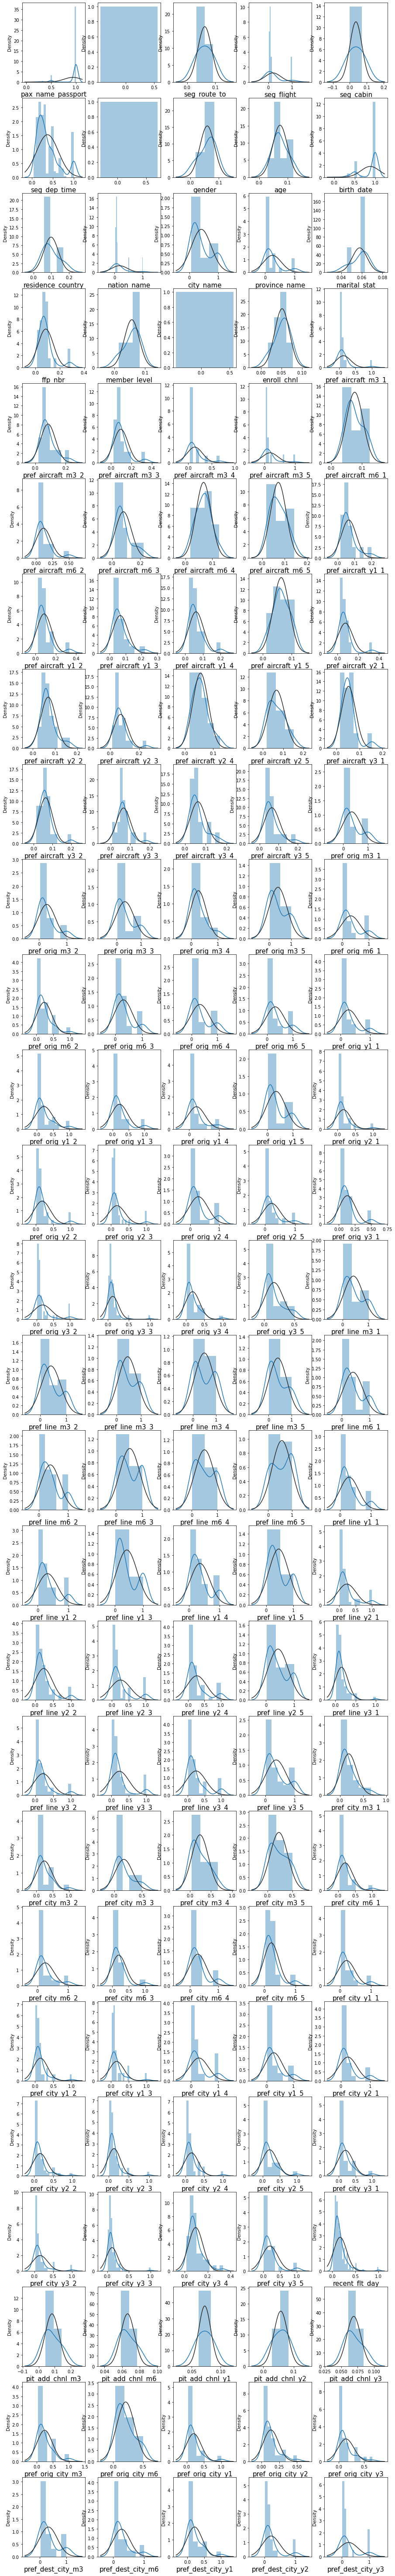

In [6]:
#离散特征计算其每种取值对应的付费选座概率，产生        概率分布图与Q-Q图——不同类别取值的付费概率
train_cols = 5
train_rows = 100  # 因为不能画出这么大的图片，先画出一部分随机抽取的
plt.figure(figsize=(3 * train_cols, 4 * train_rows))
i = 0
for col in discrete_list:
    buy_rate = [rate for rate in train.groupby([col])['emd_lable2'].mean()
                if rate > 0 and rate <= 1]
    i += 1
    try:
        ax = plt.subplot(train_rows, train_cols, i)
        sns.distplot(buy_rate, fit=stats.norm)
        ax.set_xlabel(col)
        plt.xlabel(col, fontsize=15)
    except ValueError:
        pass
plt.show()

In [9]:
drop_features = ['emd_lable','cabin_hf_cnt_m3','cabin_hf_cnt_m6','complain_valid_cnt_m3','complain_valid_cnt_m6','bag_cnt_m6’,’bag_cnt_y1','bag_cnt_y2','bag_cnt_y3','flt_cancel_cnt_y3','cabin_fall_cnt_y3','complain_cnt_m3','complain_cnt_m6','pit_out_amt','pit_add_non_amt_m3','pit_add_buy_amt_y2','pit_add_buy_amt_y3','pit_des_out_amt_m3','pit_des_out_amt_m6','pit_des_out_amt_y1','pit_add_non_cnt_m3','pit_add_bug_cnt_y2',         'pit_add_bug_cnt_y3','pit_des_mall_cnt_m6','pit_des_mall_cnt_y1','pit_des_out_cnt_m6','pit_des_out_cnt_y1','pit_ech_avg_amt_m3','pit_out_avg_amt_m3','pit_out_avg_amt_m6']

KeyError: 'bag_cnt_m6’,’bag_cnt_y1'

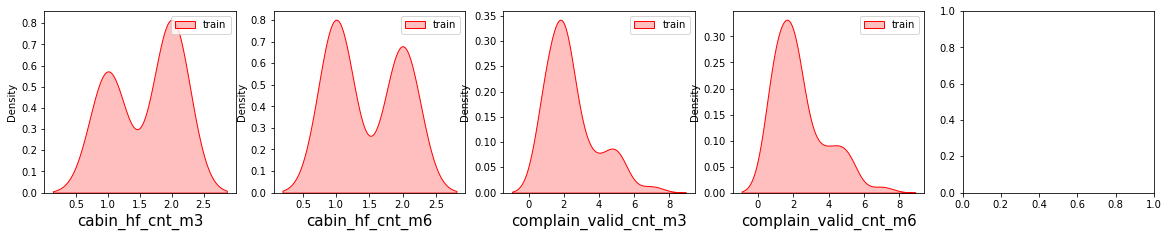

In [10]:
dist_cols = 6
dist_rows = 87
plt.figure(figsize=(4*dist_cols,4*dist_rows))
i = 1
for col in drop_features:
    if col in discrete_list:
        continue
    else:
        ax = plt.subplot(dist_rows, dist_cols, i)
        ax = sns.kdeplot(train[col][train[col]!=0], color="Red", shade=True)
        ax = sns.kdeplot(test[col][test[col]!=0], color="Blue", shade=True)
        ax.set_xlabel(col)
        plt.xlabel(col, fontsize=15)
        ax = ax.legend(["train", "test"])
        i = i + 1
plt.show()